In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('F:/Thinkful/Files/DS0004/GSS data 2002.csv')

In [3]:
# data_store = pd.HDFStore('processed_data.h5')
# data_store['preprocessed_df']= df
# data_store.close()

In [4]:
# data_store = pd.HDFStore('processed_data.h5')
# df2 = data_store['preprocessed_df']
# data_store.close()

In [5]:
L = []

In [6]:
for col in df.columns:
    table = pd.DataFrame(df[col].value_counts(normalize = True) * 100)
    if (0 in list(table.index)) and (-1 in list(table.index)):
        i = table.index.get_loc(-1)
        if ((table.index[i] == -1) and (table.iat[i,0] >10)):
            L.append(col)

In [7]:
for col in df.columns:
    table1 = pd.DataFrame(df[col].value_counts(normalize = True) * 100)
    if (0 in list(table1.index)) and (-1 not in list(table1.index)):
        j = table1.index.get_loc(0)
        if ((table1.index[j] == 0) and (table1.iat[j,0] >10)):
            L.append(col)

In [8]:
for col in df.columns:
    table2 = pd.DataFrame(df[col].value_counts(normalize = True) * 100)
    if (0 not in list(table2.index)) and (-1 in list(table2.index)):
        k = table2.index.get_loc(-1)
        if ((table2.index[k] == -1) and (table2.iat[k,0] >10)):
            L.append(col)

In [9]:
extra = ['CASEID','YEAR','ID','FORMWT','SAMPCODE','SAMPLE','OVERSAMP','BALLOT','VERSION','ISCO681',
         'ISCO88','RVISITOR','RELHH1','DOCVIG','REGDOC','DOCASKME','DOCDECID','DOCRELY','HLTHPLAN',
         'FININC','FININC1','FININC2','FININC3','FININC4','BELVEDOC','DOCINFO','DOCNOMRI','DOCSAT',
         'DOCCOSTS','DOCSWTCH','INSRCHNG','SECOPIN','FORM','COOP','DATEINTV','RESPNUM','HEFINFO',
         'RELHHD1','1-Mar','RELATE1','GENDER1','OLD1','SRCBELT','SIZE']

In [10]:
L = L + extra

In [11]:
df_new = df.copy()

In [12]:
df_new = df_new.drop(L,axis = 1)

In [13]:
len(list(df_new.columns))

77

In [14]:
list(df_new.columns)

['WRKSTAT',
 'WRKSLF',
 'WRKGOVT',
 'OCC80',
 'PRESTG80',
 'INDUS80',
 'MARITAL',
 'SIBS',
 'AGE',
 'EDUC',
 'PAEDUC',
 'MAEDUC',
 'SPEDUC',
 'SPDEG',
 'SEX',
 'RES16',
 'REG16',
 'MOBILE16',
 'FAMILY16',
 'MAWRKGRW',
 'BORN',
 'GRANBORN',
 'HOMPOP',
 'ADULTS',
 'INCOME',
 'INCOME98',
 'REGION',
 'XNORCSIZ',
 'VOTE96',
 'VOTE00',
 'NATROAD',
 'NATSOC',
 'NATMASS',
 'NATPARK',
 'NATCHLD',
 'RELIG',
 'FUND',
 'RELITEN',
 'RELIG16',
 'FUND16',
 'CLASS',
 'PHONE',
 'COMPREND',
 'VISITART',
 'GOMUSIC',
 'DRAMA',
 'COMPUSE',
 'NUMCNTCT',
 'INPERSON',
 'BYPHONE',
 'LETTERS',
 'MEETINGS',
 'BYEMAIL',
 'NUMPROBS',
 'BYEMPROB',
 'ETHIMP',
 'ETHIGNOR',
 'ETHNOFIT',
 'ETHTRADS',
 'ETHADAPT',
 'FEELBLKS',
 'FEELASNS',
 'FEELHSPS',
 'FEELWHTS',
 'ETHSAME',
 'ETHDIFF',
 'WHTSDIFF',
 'ETH1',
 'ETHNUM',
 'HISPANIC',
 'RACECEN1',
 'DWELLING',
 'HHRACE',
 'SEI',
 'COHORT',
 'ZODIAC',
 'ISSP']

# Does gender play a role in personal social status?

In [15]:
df2 = df_new[['MARITAL','WRKSTAT','SEX','BYEMPROB','NUMPROBS','NUMCNTCT','INCOME','INCOME98','ADULTS','HOMPOP',
              'GRANBORN','AGE','SIBS','SEI','EDUC']]

In [16]:
df2 = df2[df2.BYEMPROB != -1]
df2 = df2[df2.BYEMPROB != 98]
df2 = df2[df2.BYEMPROB != 99]
df2 = df2[df2.NUMPROBS != -1]
df2 = df2[df2.NUMPROBS != 98]
df2 = df2[df2.NUMPROBS != 99]
df2 = df2[df2.NUMCNTCT <= 500]
df2 = df2[df2.NUMCNTCT != -1]
df2 = df2[df2.INCOME != 98]
df2 = df2[df2.INCOME != 13]
df2 = df2[df2.INCOME98 != 24]
df2 = df2[df2.INCOME98 != 98]
df2 = df2[df2.INCOME98 != 99]
df2 = df2[df2.GRANBORN != 8]
df2 = df2[df2.GRANBORN != 9]
df2 = df2[df2.GRANBORN != -1]
df2 = df2[df2.AGE != 99]
df2 = df2[df2.SIBS != 99]
df2 = df2[df2.SIBS != 98]
df2 = df2[df2.SEI != 0.0]
df2 = df2[df2.EDUC != 98]
df2 = df2[df2.EDUC != 99]

In [17]:
df2

,MARITAL,WRKSTAT,SEX,BYEMPROB,NUMPROBS,NUMCNTCT,INCOME,INCOME98,ADULTS,HOMPOP,GRANBORN,AGE,SIBS,SEI,EDUC
0,3,1,2,5,20,25,12,16,1,1,0,25,1,57.1,14
1,1,1,1,5,5,25,12,23,1,1,0,43,2,48.5,16
3,3,1,2,3,3,20,12,23,1,1,4,55,1,73.2,2
4,3,1,1,0,2,2,12,18,1,1,0,37,11,44.7,7
5,3,1,1,1,1,15,12,22,1,1,0,47,2,47.6,12
6,1,5,2,5,5,11,12,23,2,2,0,57,1,78.5,16
7,1,7,2,0,12,40,12,17,2,2,0,71,6,34.6,12
8,3,1,1,2,3,15,12,20,2,2,2,46,2,63.5,14
9,5,2,2,0,4,6,12,19,2,2,1,19,1,38.4,13
10,1,1,1,0,6,6,12,21,3,3,2,52,2,61.9,14


In [18]:
df2.columns = ['Marital','WorkStatus','_Gender_P63','cCloEmlFrinds_P205','cFriendsCanSee_P203',
               'cNumContact_P171','cIncome_P74','cFamilyIncome_P76','cFamilyAdults_P72',
               'cHOMEPOP_P70','cGranParentsBORN_P70','cAge_P53','cNumSiblings_P51',
               'cSEI_P697','cEducation_P57']

In [19]:
df2

,Marital,WorkStatus,_Gender_P63,cCloEmlFrinds_P205,cFriendsCanSee_P203,cNumContact_P171,cIncome_P74,cFamilyIncome_P76,cFamilyAdults_P72,cHOMEPOP_P70,cGranParentsBORN_P70,cAge_P53,cNumSiblings_P51,cSEI_P697,cEducation_P57
0,3,1,2,5,20,25,12,16,1,1,0,25,1,57.1,14
1,1,1,1,5,5,25,12,23,1,1,0,43,2,48.5,16
3,3,1,2,3,3,20,12,23,1,1,4,55,1,73.2,2
4,3,1,1,0,2,2,12,18,1,1,0,37,11,44.7,7
5,3,1,1,1,1,15,12,22,1,1,0,47,2,47.6,12
6,1,5,2,5,5,11,12,23,2,2,0,57,1,78.5,16
7,1,7,2,0,12,40,12,17,2,2,0,71,6,34.6,12
8,3,1,1,2,3,15,12,20,2,2,2,46,2,63.5,14
9,5,2,2,0,4,6,12,19,2,2,1,19,1,38.4,13
10,1,1,1,0,6,6,12,21,3,3,2,52,2,61.9,14


In [20]:
df_con = df2[['cCloEmlFrinds_P205','cFriendsCanSee_P203',
               'cNumContact_P171','cIncome_P74','cFamilyIncome_P76','cFamilyAdults_P72',
               'cHOMEPOP_P70','cGranParentsBORN_P70','cAge_P53','cNumSiblings_P51',
               'cSEI_P697','cEducation_P57']]

In [21]:
normalized_df=(df_con-df_con.mean())/df_con.std()

In [22]:
normalized_df

,cCloEmlFrinds_P205,cFriendsCanSee_P203,cNumContact_P171,cIncome_P74,cFamilyIncome_P76,cFamilyAdults_P72,cHOMEPOP_P70,cGranParentsBORN_P70,cAge_P53,cNumSiblings_P51,cSEI_P697,cEducation_P57
0,0.247241,1.050116,-0.144241,0.474940,-0.062248,-1.028185,-1.000350,-0.697461,-1.222463,-0.868377,0.356415,0.124309
1,0.247241,-0.326521,-0.144241,0.474940,1.275908,-1.028185,-1.000350,-0.697461,-0.140350,-0.521255,-0.089236,0.820240
3,-0.053163,-0.510072,-0.252757,0.474940,1.275908,-1.028185,-1.000350,1.846291,0.581059,-0.868377,1.190714,-4.051278
4,-0.503768,-0.601848,-0.643414,0.474940,0.320082,-1.028185,-1.000350,-0.697461,-0.501054,2.602837,-0.286151,-2.311450
5,-0.353566,-0.693624,-0.361272,0.474940,1.084743,-1.028185,-1.000350,-0.697461,0.100120,-0.521255,-0.135874,-0.571622
6,0.247241,-0.326521,-0.448085,0.474940,1.275908,0.283509,-0.255274,-0.697461,0.701294,-0.868377,1.465359,0.820240
7,-0.503768,0.315910,0.181307,0.474940,0.128917,0.283509,-0.255274,-0.697461,1.542938,0.867230,-0.809531,-0.571622
8,-0.203364,-0.510072,-0.361272,0.474940,0.702413,0.283509,-0.255274,0.574415,0.040003,-0.521255,0.688062,0.124309
9,-0.503768,-0.418296,-0.556601,0.474940,0.511247,0.283509,-0.255274,-0.061523,-1.583167,-0.868377,-0.612616,-0.223657
10,-0.503768,-0.234745,-0.556601,0.474940,0.893578,1.595203,0.489802,0.574415,0.400707,-0.521255,0.605150,0.124309


D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


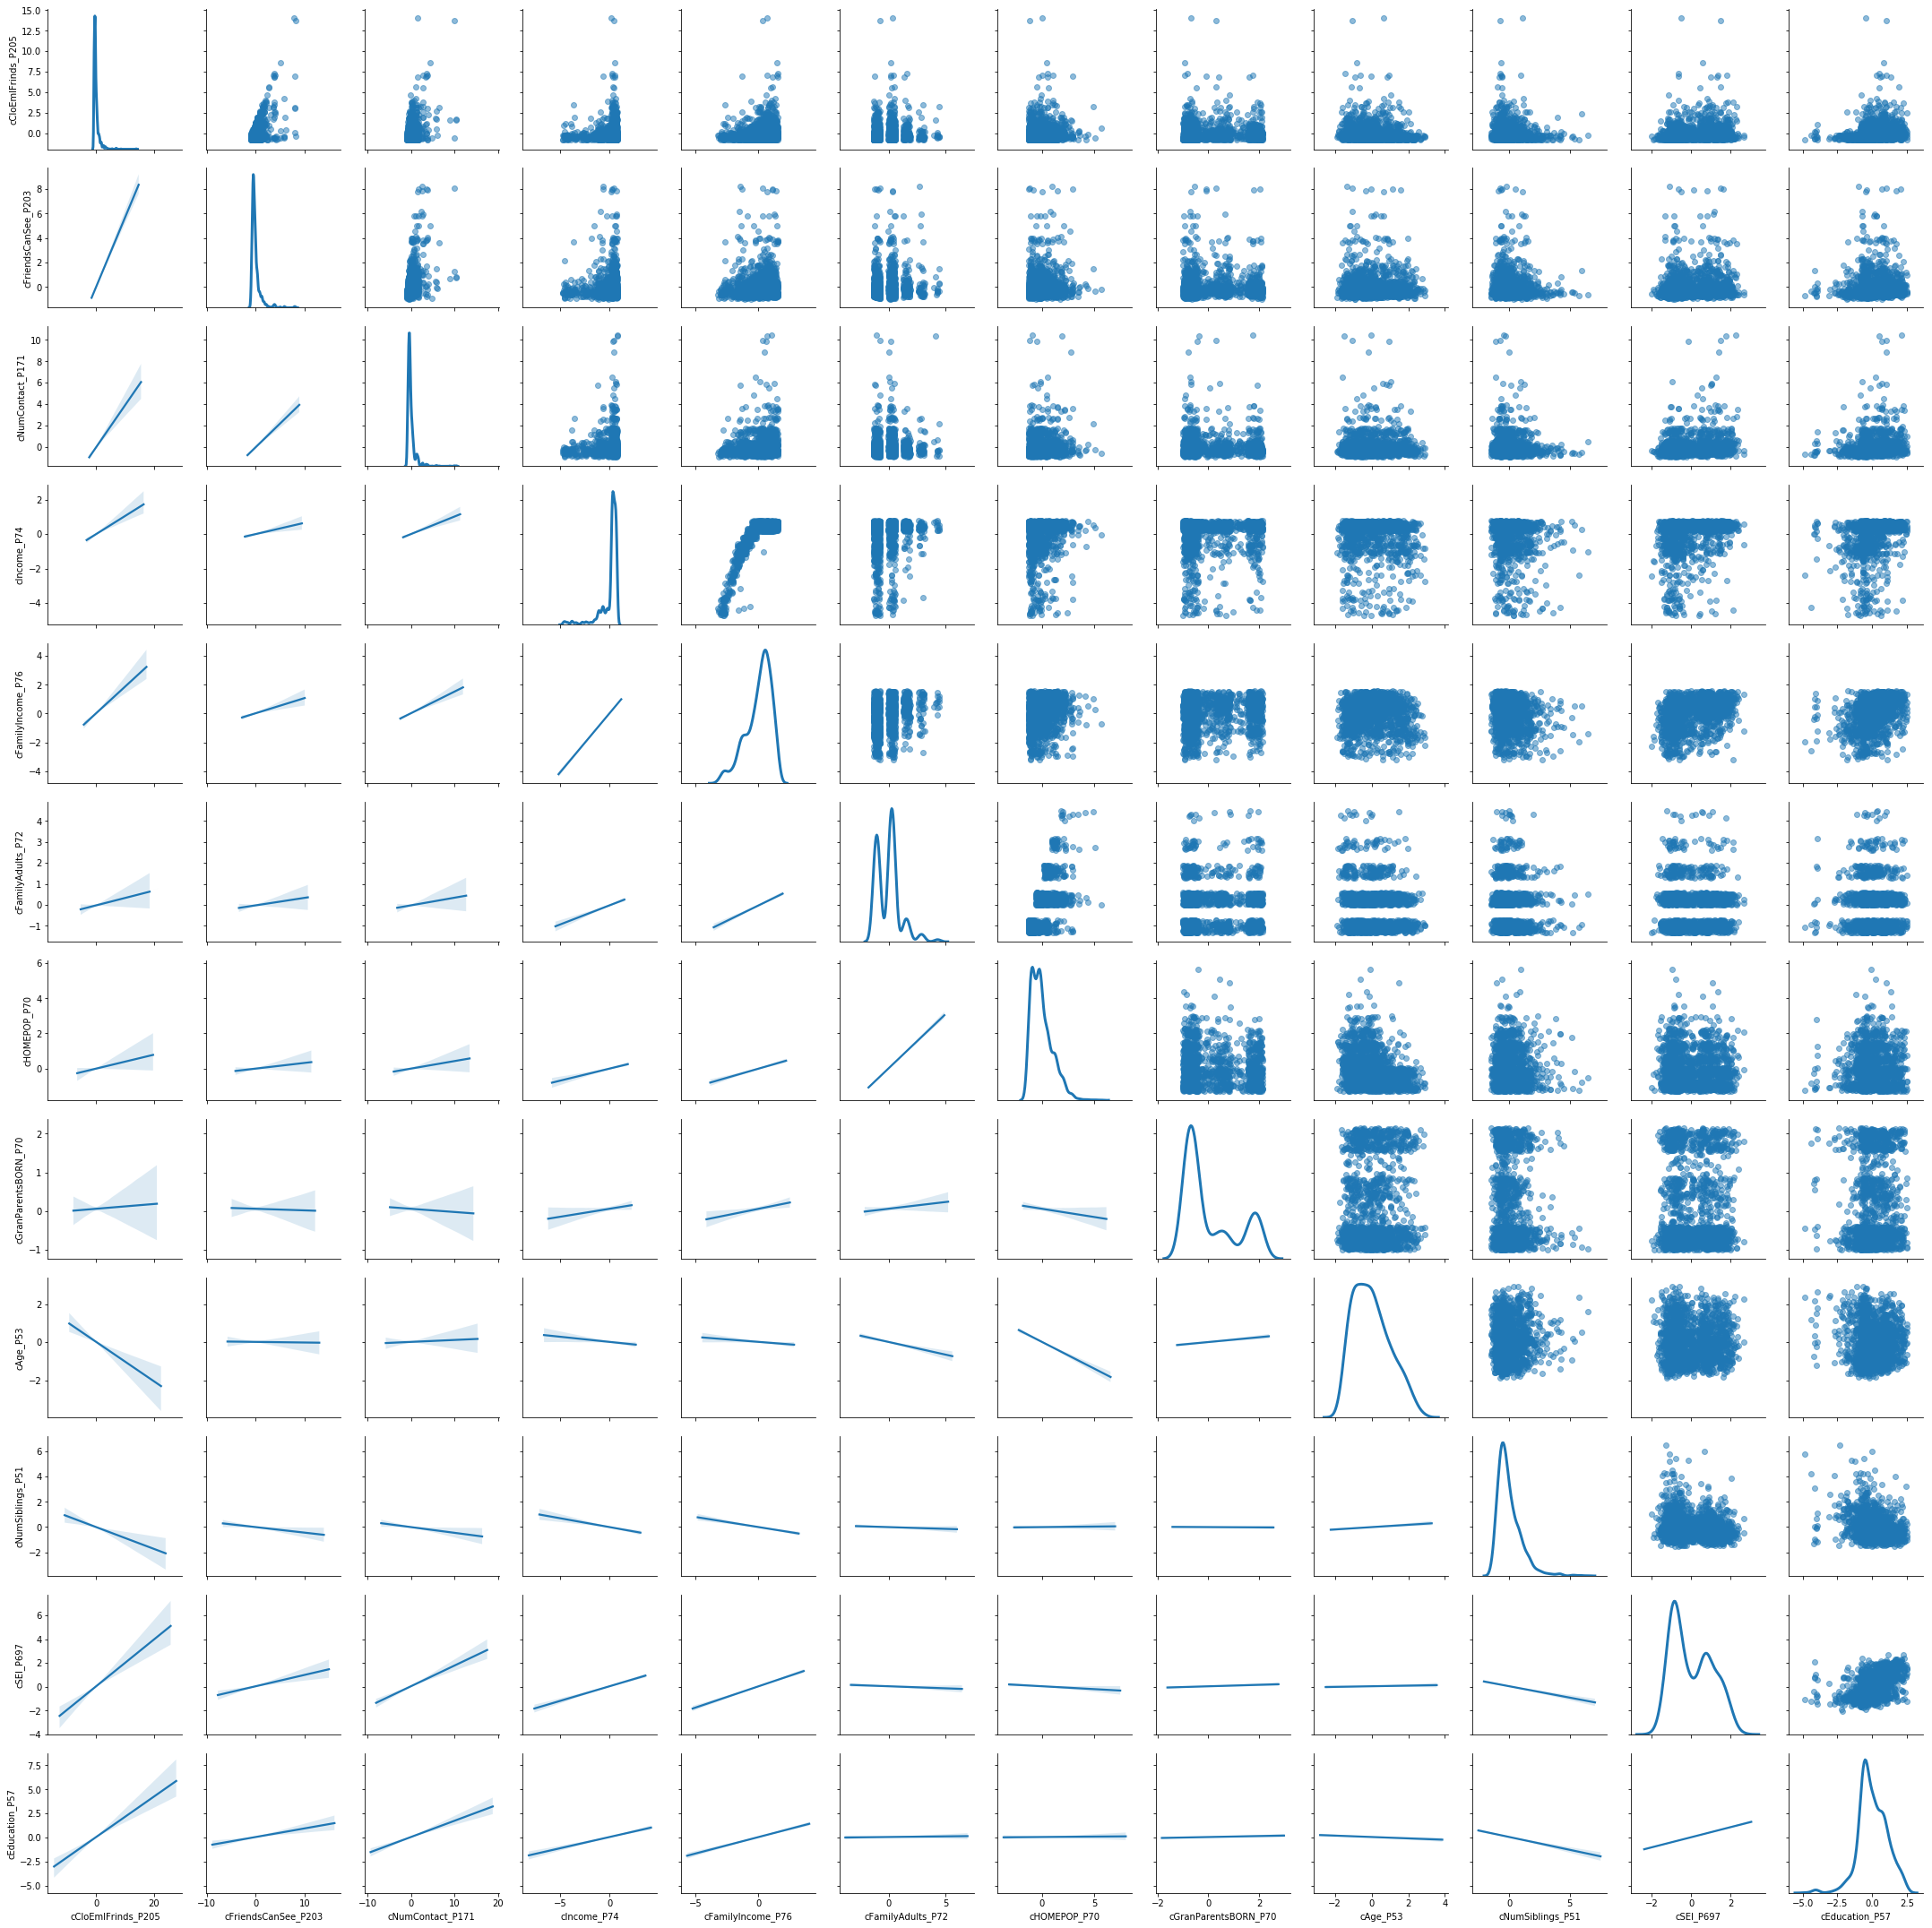

In [23]:
df_jittered = normalized_df[['cCloEmlFrinds_P205','cFriendsCanSee_P203',
               'cNumContact_P171','cIncome_P74','cFamilyIncome_P76','cFamilyAdults_P72',
               'cHOMEPOP_P70','cGranParentsBORN_P70','cAge_P53','cNumSiblings_P51',
               'cSEI_P697','cEducation_P57']].dropna()
# Making the random noise.
jitter = pd.DataFrame(
    np.random.uniform(-.3, .3, size=(df_jittered.shape)),
    columns=df_jittered.columns
)
# Combine the data and the noise.
df_jittered = df_jittered.add(jitter)

# Declare that you want to make a scatterplot matrix.
g = sns.PairGrid(df_jittered.dropna(), diag_sharey=False)
# Scatterplot.
g.map_upper(plt.scatter, alpha=.5)
# Fit line summarizing the linear relationship of the two variables.
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# Give information about the univariate distributions of the variables.
g.map_diag(sns.kdeplot, lw=3)
plt.show()


                      cCloEmlFrinds_P205  cFriendsCanSee_P203  \
cCloEmlFrinds_P205              1.000000             0.345645   
cFriendsCanSee_P203             0.345645             1.000000   
cNumContact_P171                0.234261             0.459345   
cIncome_P74                     0.207341             0.098865   
cFamilyIncome_P76               0.226780             0.121643   
cFamilyAdults_P72               0.046099             0.035328   
cHOMEPOP_P70                    0.056523             0.010922   
cGranParentsBORN_P70            0.034272             0.010678   
cAge_P53                       -0.113353             0.021259   
cNumSiblings_P51               -0.115060            -0.057009   
cSEI_P697                       0.253402             0.105895   
cEducation_P57                  0.317781             0.137723   

                      cNumContact_P171  cIncome_P74  cFamilyIncome_P76  \
cCloEmlFrinds_P205            0.234261     0.207341           0.226780   
cFrien

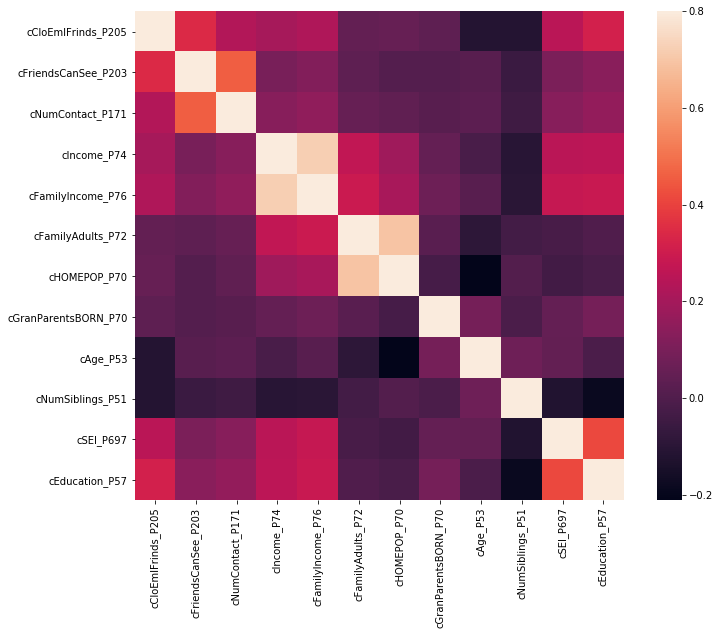

In [24]:
# Make the correlation matrix.
corrmat = df_con.corr(method = 'kendall')
print(corrmat)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

                      cCloEmlFrinds_P205  cFriendsCanSee_P203  \
cCloEmlFrinds_P205              1.000000             0.576698   
cFriendsCanSee_P203             0.576698             1.000000   
cNumContact_P171                0.389524             0.474796   
cIncome_P74                     0.119805             0.063727   
cFamilyIncome_P76               0.185671             0.091475   
cFamilyAdults_P72               0.017591             0.030492   
cHOMEPOP_P70                    0.027108             0.018371   
cGranParentsBORN_P70            0.030867            -0.002269   
cAge_P53                       -0.086221             0.005477   
cNumSiblings_P51               -0.100344            -0.063684   
cSEI_P697                       0.223916             0.084549   
cEducation_P57                  0.235660             0.108971   

                      cNumContact_P171  cIncome_P74  cFamilyIncome_P76  \
cCloEmlFrinds_P205            0.389524     0.119805           0.185671   
cFrien

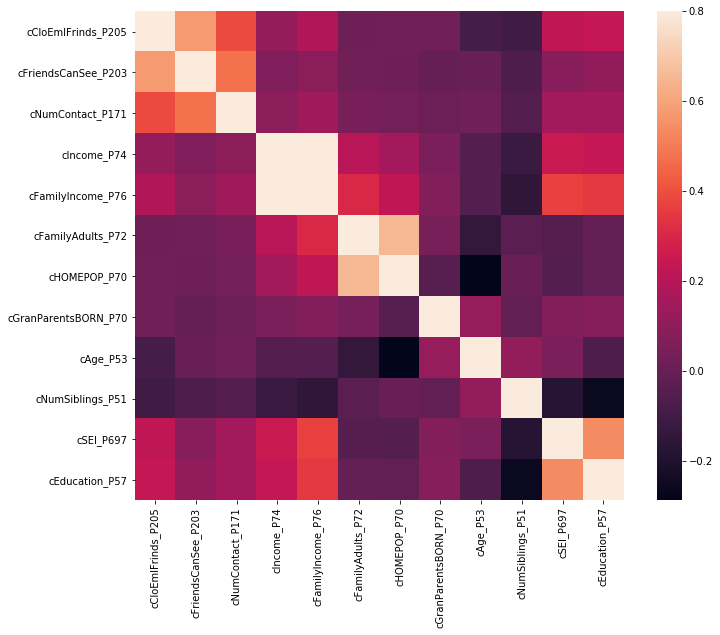

In [25]:
# Make the correlation matrix.
corrmat2 = df_con.corr()
print(corrmat2)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat2, vmax=.8, square=True)
plt.show()

                      cCloEmlFrinds_P205  cFriendsCanSee_P203  \
cCloEmlFrinds_P205              1.000000             0.577495   
cFriendsCanSee_P203             0.577495             1.000000   
cNumContact_P171                0.415508             0.463846   
cIncome_P74                     0.108491             0.066878   
cFamilyIncome_P76               0.191756             0.107832   
cFamilyAdults_P72               0.035948             0.036019   
cHOMEPOP_P70                    0.041080             0.033157   
cGranParentsBORN_P70            0.006227            -0.004108   
cAge_P53                       -0.107797            -0.003302   
cNumSiblings_P51               -0.091285            -0.045781   
cSEI_P697                       0.203965             0.097664   
cEducation_P57                  0.216730             0.091076   

                      cNumContact_P171  cIncome_P74  cFamilyIncome_P76  \
cCloEmlFrinds_P205            0.415508     0.108491           0.191756   
cFrien

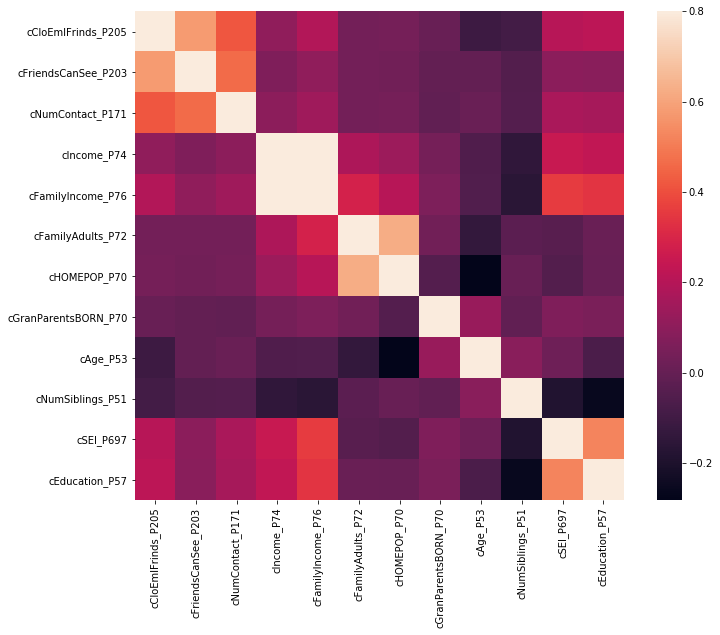

In [26]:
# Make the correlation matrix.
corrmat3 = df_jittered.corr()
print(corrmat3)

# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))

# Draw the heatmap using seaborn.
sns.heatmap(corrmat3, vmax=.8, square=True)
plt.show()

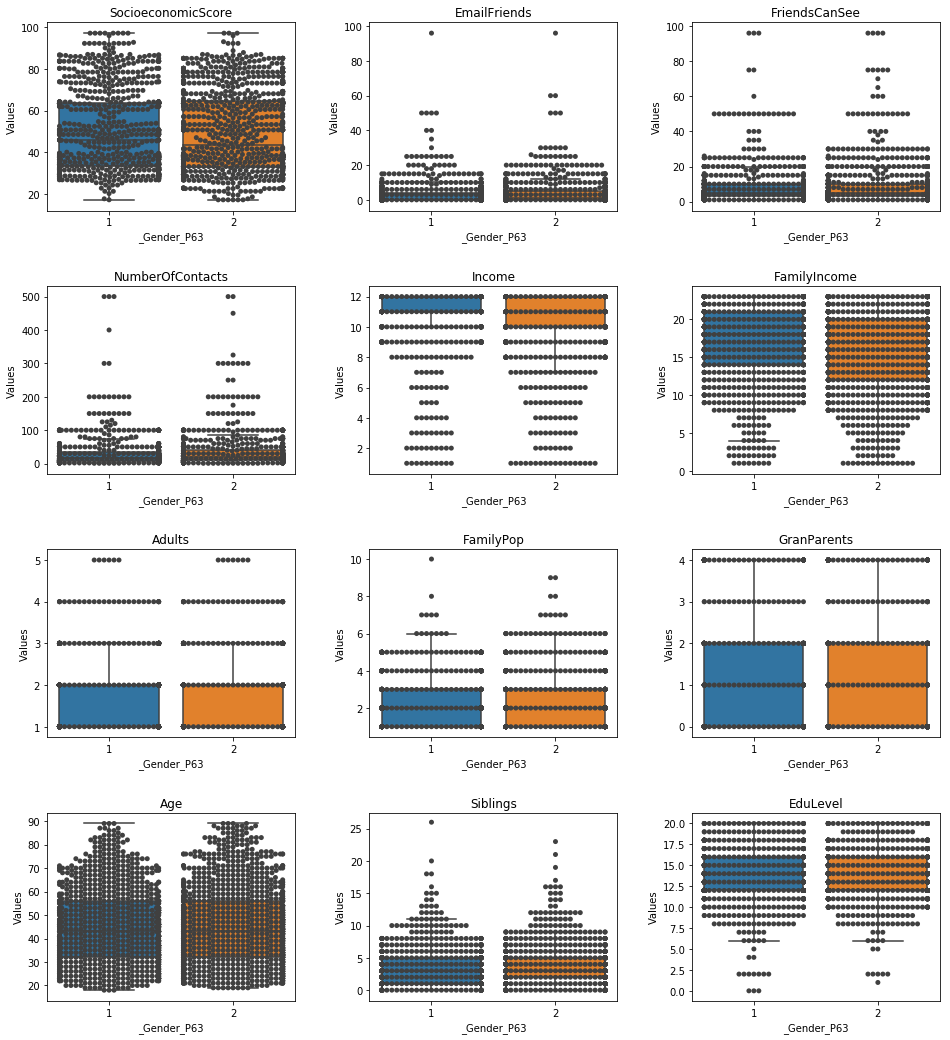

In [27]:
df3 = df2[['_Gender_P63','cCloEmlFrinds_P205','cFriendsCanSee_P203','cNumContact_P171','cIncome_P74',
           'cFamilyIncome_P76','cFamilyAdults_P72','cHOMEPOP_P70','cGranParentsBORN_P70','cAge_P53',
           'cNumSiblings_P51','cSEI_P697','cEducation_P57']]
df_long = df3

plt.figure(figsize=(16, 18))

plt.subplot(4, 3, 1)
sns.boxplot(x='_Gender_P63',y='cSEI_P697',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cSEI_P697',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('SocioeconomicScore')

plt.subplot(4, 3, 2)
sns.boxplot(x='_Gender_P63',y='cCloEmlFrinds_P205',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cCloEmlFrinds_P205',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('EmailFriends')

plt.subplot(4, 3, 3)
sns.boxplot(x='_Gender_P63',y='cFriendsCanSee_P203',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cFriendsCanSee_P203',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('FriendsCanSee')

plt.subplot(4, 3, 4)
sns.boxplot(x='_Gender_P63',y='cNumContact_P171',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cNumContact_P171',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('NumberOfContacts')

plt.subplot(4, 3, 5)
sns.boxplot(x='_Gender_P63',y='cIncome_P74',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cIncome_P74',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('Income')

plt.subplot(4, 3, 6)
sns.boxplot(x='_Gender_P63',y='cFamilyIncome_P76',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cFamilyIncome_P76',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('FamilyIncome')

plt.subplot(4, 3, 7)
sns.boxplot(x='_Gender_P63',y='cFamilyAdults_P72',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cFamilyAdults_P72',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('Adults')

plt.subplot(4, 3, 8)
sns.boxplot(x='_Gender_P63',y='cHOMEPOP_P70',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cHOMEPOP_P70',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('FamilyPop')

plt.subplot(4, 3, 9)
sns.boxplot(x='_Gender_P63',y='cGranParentsBORN_P70',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cGranParentsBORN_P70',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('GranParents')

plt.subplot(4, 3, 10)
sns.boxplot(x='_Gender_P63',y='cAge_P53',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cAge_P53',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('Age')

plt.subplot(4, 3, 11)
sns.boxplot(x='_Gender_P63',y='cNumSiblings_P51',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cNumSiblings_P51',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('Siblings')

plt.subplot(4, 3, 12)
sns.boxplot(x='_Gender_P63',y='cEducation_P57',data=df_long,showfliers=False)
sns.swarmplot(x='_Gender_P63',y='cEducation_P57',data=df_long, color=".25")
plt.ylabel('Values')
plt.title('EduLevel')

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
plt.show()

In [28]:
# Restructure the data so we can use FacetGrid rather than making a boxplot
# for each variable separately.
df_long = pd.melt(df_long, id_vars=['_Gender_P63'])

#g = sns.FacetGrid(df_long, col="variable", size=5, aspect=.5)
#g = g.map(sns.boxplot, '_REGDOC_P344', "value",showfliers=False)

#plt.show()

# Descriptive statistics by group.
print(df3.groupby('_Gender_P63').describe())

# Test whether group differences are significant.
for col in df3.loc[:,'cCloEmlFrinds_P205':'cEducation_P57'].columns:
    print(col)
    print(stats.ttest_ind(
        df3[df3['_Gender_P63'] == 1][col].dropna(),
        df3[df3['_Gender_P63'] == 2][col].dropna()
    ))

            cAge_P53                                                      \
               count       mean        std   min   25%   50%   75%   max   
_Gender_P63                                                                
1              945.0  45.362963  16.442971  18.0  32.0  43.0  56.0  89.0   
2             1174.0  45.311755  16.793361  19.0  32.0  43.0  56.0  89.0   

            cCloEmlFrinds_P205            ...  cNumSiblings_P51        \
                         count      mean  ...               75%   max   
_Gender_P63                               ...                           
1                        945.0  3.197884  ...               5.0  26.0   
2                       1174.0  3.479557  ...               5.0  23.0   

            cSEI_P697                                                       
                count       mean        std   min   25%    50%   75%   max  
_Gender_P63                                                                 
1               945.0 

In [29]:
# 1st feature
df2['WrkStatus'] = None
df2.loc[df2['WorkStatus'] == 1, 'WrkStatus'] = 'FT'
df2.loc[df2['WorkStatus'] == 2, 'WrkStatus'] = 'PT'
df2.loc[df2['WorkStatus'] == 3, 'WrkStatus'] = 'TempNoWrk'
df2.loc[df2['WorkStatus'] == 4, 'WrkStatus'] = 'Unemployed'
df2.loc[df2['WorkStatus'] == 5, 'WrkStatus'] = 'Retired'
df2.loc[df2['WorkStatus'] == 6, 'WrkStatus'] = 'School'
df2.loc[df2['WorkStatus'] == 7, 'WrkStatus'] = 'KeepingHouse'
df2.loc[df2['WorkStatus'] == 8, 'WrkStatus'] = 'Other'

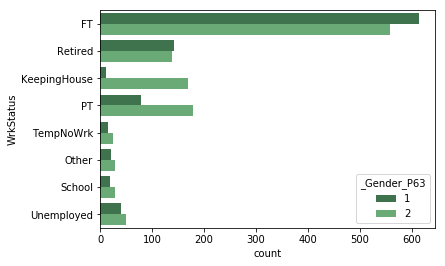

In [30]:
sns.countplot(y='WrkStatus', hue='_Gender_P63', data=df2, palette="Greens_d")
plt.show()

In [31]:
# 2nd Feature
means = df2[['cIncome_P74','cFamilyIncome_P76']].mean(axis=0)
stds = df2[['cIncome_P74','cFamilyIncome_P76']].std(axis=0)
df2['FamilyIncome'] = ((df2[['cIncome_P74','cFamilyIncome_P76']] - means) / stds).mean(axis=1)

In [32]:
plotdf = df2.loc[:, ['cIncome_P74','cFamilyIncome_P76']]
plotdf['FamilyInc'] = df2['FamilyIncome'] 
corrmat4 = plotdf.corr()

print(corrmat4)

                   cIncome_P74  cFamilyIncome_P76  FamilyInc
cIncome_P74           1.000000           0.850703   0.961952
cFamilyIncome_P76     0.850703           1.000000   0.961952
FamilyInc             0.961952           0.961952   1.000000


In [33]:
# 3rd feature
df2['LiveWithPartner'] = np.where(df2['Marital'] == 1, 1, 0)

In [34]:
# 4th feature
df2['Marital_Status'] = None
df2.loc[df2['Marital'] == 1, 'Marital_Status'] = 'Married'
df2.loc[df2['Marital'] == 2, 'Marital_Status'] = 'Widowed'
df2.loc[df2['Marital'] == 3, 'Marital_Status'] = 'Divorced'
df2.loc[df2['Marital'] == 4, 'Marital_Status'] = 'Separated'
df2.loc[df2['Marital'] == 5, 'Marital_Status'] = 'Never Married'
#sns.catplot(x= '_SEX', y = 'cAGE_P53', hue = '_REGDOC_P344',col = 'Marital_Status',data = df2,kind="box", height=4, aspect=.7)
#plt.show()

In [35]:
# 5th feature
df2['FTorNot'] = np.where(df2['WorkStatus'] == 1,1,0)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


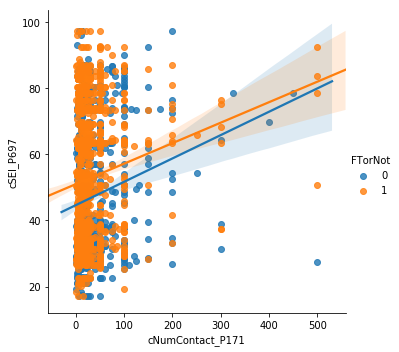

In [50]:
sns.lmplot(
    x='cNumContact_P171',
    y='cSEI_P697',
    hue='FTorNot',
    data=df2,
)
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


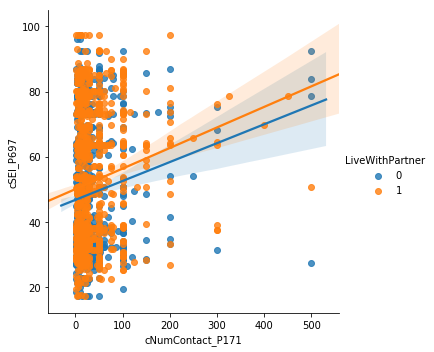

In [49]:
sns.lmplot(
    x='cNumContact_P171',
    y='cSEI_P697',
    hue='LiveWithPartner',
    data=df2,
)
plt.show()

In [ ]:
df2['']

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


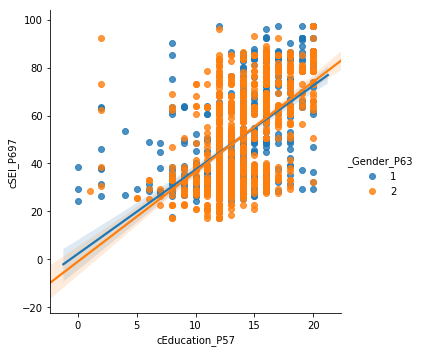

In [48]:
sns.lmplot(
    x='cEducation_P57',
    y='cSEI_P697',
    hue='_Gender_P63',
    data=df2,
)
plt.show()

In [39]:
df2['HighSchool'] = np.where(df2['cEducation_P57'] > 12,1,0)

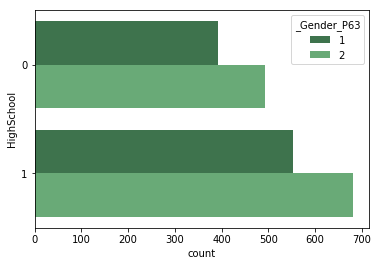

In [40]:
sns.countplot(y='HighSchool', hue='_Gender_P63', data=df2, palette="Greens_d")
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


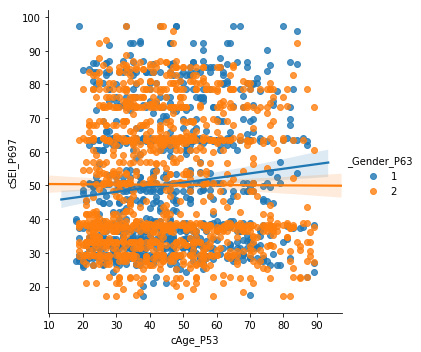

In [47]:
sns.lmplot(
    x='cAge_P53',
    y='cSEI_P697',
    hue='_Gender_P63',
    data=df2,
)
plt.show()

In [42]:
df2['cSEI_P697'].describe()

count    2119.000000
mean       50.222039
std        19.297634
min        17.100000
25%        33.100000
50%        45.400000
75%        64.100000
max        97.200000
Name: cSEI_P697, dtype: float64

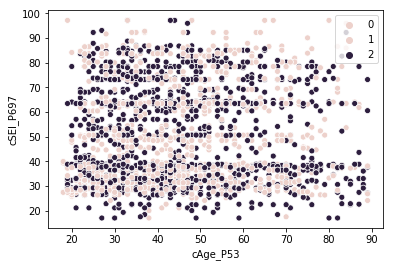

In [45]:
sns.scatterplot(x='cAge_P53',y='cSEI_P697',hue = '_Gender_P63',data = df2)

In [46]:
df2['_Gender_P63'].describe()

count    2119.000000
mean        1.554035
std         0.497189
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: _Gender_P63, dtype: float64

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


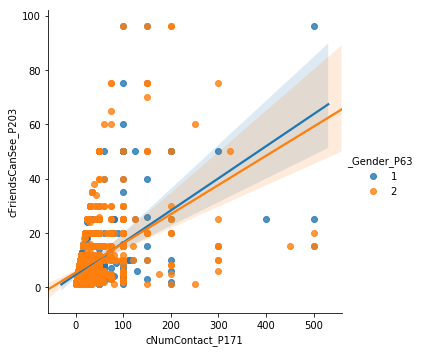

In [51]:
sns.lmplot(
    x='cNumContact_P171',
    y='cFriendsCanSee_P203',
    hue='_Gender_P63',
    data=df2
)
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


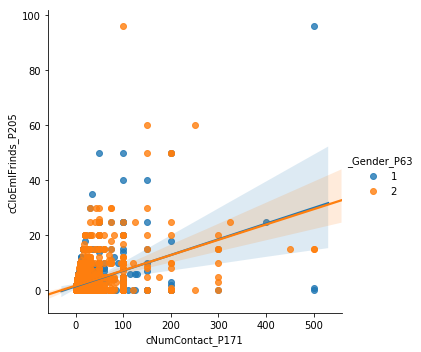

In [52]:
sns.lmplot(
    x='cNumContact_P171',
    y='cCloEmlFrinds_P205',
    hue='_Gender_P63',
    data=df2
)
plt.show()

In [53]:
df2['FamilyGuy'] = np.where((df2['FTorNot'] == 1) &(df2['Marital'] == 1),1,0)

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


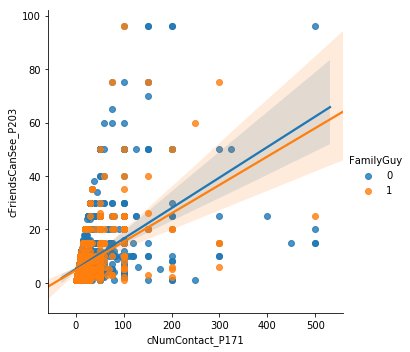

In [55]:
sns.lmplot(
    x='cNumContact_P171',
    y='cFriendsCanSee_P203',
    hue='FamilyGuy',
    data=df2
)
plt.show()

In [78]:
df2

,Marital,WorkStatus,_Gender_P63,cCloEmlFrinds_P205,cFriendsCanSee_P203,cNumContact_P171,cIncome_P74,cFamilyIncome_P76,cFamilyAdults_P72,cHOMEPOP_P70,cGranParentsBORN_P70,cAge_P53,cNumSiblings_P51,cSEI_P697,cEducation_P57,LiveWithPartner,FTorNot,Marital_Status,HighSchool
0,3,1,2,5,20,25,12,16,1,1,0,25,1,57.1,14,0,1,Divorced,1
1,1,1,1,5,5,25,12,23,1,1,0,43,2,48.5,16,1,1,Married,1
3,3,1,2,3,3,20,12,23,1,1,4,55,1,73.2,2,0,1,Divorced,0
4,3,1,1,0,2,2,12,18,1,1,0,37,11,44.7,7,0,1,Divorced,0
5,3,1,1,1,1,15,12,22,1,1,0,47,2,47.6,12,0,1,Divorced,0
6,1,5,2,5,5,11,12,23,2,2,0,57,1,78.5,16,1,0,Married,1
7,1,7,2,0,12,40,12,17,2,2,0,71,6,34.6,12,1,0,Married,0
8,3,1,1,2,3,15,12,20,2,2,2,46,2,63.5,14,0,1,Divorced,1
9,5,2,2,0,4,6,12,19,2,2,1,19,1,38.4,13,0,0,Never Married,1
10,1,1,1,0,6,6,12,21,3,3,2,52,2,61.9,14,1,1,Married,1


In [56]:
# sns.catplot(x= '_SEX', y = 'cSEI_P697', hue = '_REGDOC_P344',col = 'Marital_Status',data = df2,kind="box", height=4, aspect=.7)
# plt.subplots_adjust(hspace = 0.3,wspace = 0.5)
# plt.show()